In [1]:
#import libraries

from nltk.tokenize import sent_tokenize
from nltk.tokenize.treebank import TreebankWordTokenizer
import nltk
import glob
from pathlib import Path
import os
import gensim
import pandas as pd
from gensim.models import Word2Vec
from tqdm import tqdm
import multiprocessing

In [2]:
import os
base_dir_GB = "/media/secure_volume/noveltm_genderbalanced/"
all_docs_GB = []
docs_GB = os.listdir(base_dir_GB)

In [3]:
#checking i can read through
for doc in docs_GB:
    filename_GB = os.fsdecode(doc)
    if not doc.startswith('.'):
        print(os.path.join(base_dir_GB, filename_GB))

/media/secure_volume/noveltm_genderbalanced/hvd.hwe3lv.txt
/media/secure_volume/noveltm_genderbalanced/uiuo.ark+=13960=t08w41v7r.txt
/media/secure_volume/noveltm_genderbalanced/uc1.b3727928.txt
/media/secure_volume/noveltm_genderbalanced/uc1.b4446335.txt
/media/secure_volume/noveltm_genderbalanced/njp.32101068175213.txt
/media/secure_volume/noveltm_genderbalanced/nyp.33433074888862.txt
/media/secure_volume/noveltm_genderbalanced/mdp.39015002705260.txt
/media/secure_volume/noveltm_genderbalanced/uiuo.ark+=13960=t49p3jr9j.txt
/media/secure_volume/noveltm_genderbalanced/nyp.33433074911581.txt
/media/secure_volume/noveltm_genderbalanced/uva.x030825524.txt
/media/secure_volume/noveltm_genderbalanced/mdp.39015001153629.txt
/media/secure_volume/noveltm_genderbalanced/inu.30000124732995.txt
/media/secure_volume/noveltm_genderbalanced/wu.89092952837.txt
/media/secure_volume/noveltm_genderbalanced/uiuo.ark+=13960=t8nc6b618.txt
/media/secure_volume/noveltm_genderbalanced/uiuo.ark+=13960=t12n5mx4m

In [4]:
#checking number of files is correct
for doc in docs_GB:
    if not doc.startswith('.'):
        with open(base_dir_GB + doc, "r", encoding="utf-8") as file:
            text_GB = file.read()
            all_docs_GB.append(text_GB)
            

len(all_docs_GB)

1501

In [5]:
#setting up tokenizer

tokenizer = TreebankWordTokenizer()
files_GB = glob.glob(f"{base_dir_GB}/.txt")
titles_GB = [Path(file).stem for file in files_GB]

In [6]:
#tokenizer function

def make_sentences_GB(list_text):
    all_txt_GB = []
    counter = 0
    for txt in tqdm(list_text, desc="Preprocessing"):
        lower_txt = txt.lower()
        sentences_GB = sent_tokenize(lower_txt)
        sentences_GB = [tokenizer.tokenize(sent) for sent in sentences_GB]
        all_txt_GB += sentences_GB
        counter += 1
    return all_txt_GB

In [7]:
#preprocessing
sentences_GB = make_sentences_GB(all_docs_GB)

Preprocessing: 100%|████████████████████████| 1501/1501 [28:16<00:00,  1.13s/it]


In [8]:
os.cpu_count()

49

In [10]:
NovelGB_model=gensim.models.Word2Vec(
sentences_TM, #forgot to change the name here, so re-trained this variable with this name. if i do again, i should channnnnnnnnnnge this
min_count=2,
vector_size=300,
workers=48)

In [11]:
NovelGB_model.save("NovelGB_model")

In [2]:
#to reload model

from gensim.models import Word2Vec
NovelGB_model= Word2Vec.load("NovelGB_model")

In [6]:
#a data frame that depicts top 15 most similar words to variable "similar_words"
import pandas as pd
pd.set_option('display.max_columns', None)
base_words = ['toxic', 'pollution', 'river', 'water', 'ocean', 'sea', 'stream', 'creek','sewer', 'foam', 'sewage', 'clean', 'dirty', 'cleanse', 'infect']

#calculate similarities
similar_words = []
for word in base_words:
    sim_words=NovelGB_model.wv.most_similar(word, topn=15)
    similar_words.append(sim_words)

#Create a data frame
df = pd.DataFrame(similar_words)
df = df.T
df.columns=base_words
df

,toxic,pollution,river,water,ocean,sea,stream,creek,sewer,foam,sewage,clean,dirty,cleanse,infect
0,"(gases, 0.5836181640625)","(contamination, 0.641476571559906)","(lake, 0.8201000094413757)","(waters, 0.6701378226280212)","(sea, 0.8253641128540039)","(ocean, 0.825364351272583)","(river, 0.8086833357810974)","(river, 0.8015443682670593)","(hole, 0.5964390635490417)","(spray, 0.7613233923912048)","(irrigation, 0.6318671107292175)","(tidy, 0.6269406676292419)","(filthy, 0.7763009667396545)","(purify, 0.747706949710846)","(overwhelm, 0.674156904220581)"
1,"(sulphur, 0.5808782577514648)","(taint, 0.6205472946166992)","(seine, 0.8167222738265991)","(liquid, 0.6616754531860352)","(waters, 0.7299224734306335)","(seas, 0.727790117263794)","(rivulet, 0.7902411818504333)","(pond, 0.7454368472099304)","(sewers, 0.5935907363891602)","(froth, 0.7057977318763733)","(sewers, 0.6144238114356995)","(spotlessly, 0.6224311590194702)","(greasy, 0.6870025992393494)","(purge, 0.676183819770813)","(assail, 0.64708012342453)"
2,"(putrid, 0.5753074288368225)","(corruption, 0.5909497737884521)","(stream, 0.8086833953857422)","(stream, 0.6556802988052368)","(billows, 0.7197095155715942)","(lake, 0.7127814292907715)","(streams, 0.7378213405609131)","(gully, 0.7101837992668152)","(tank, 0.5873997807502747)","(surf, 0.6962806582450867)","(petrol, 0.5943443179130554)","(scrubbed, 0.5976706147193909)","(smelly, 0.6687042713165283)","(expel, 0.6507478356361389)","(overpower, 0.6207764744758606)"
3,"(sulphureous, 0.5623388886451721)","(pestilential, 0.5733051896095276)","(creek, 0.8015443682670593)","(spray, 0.6497374773025513)","(estuary, 0.7071107029914856)","(waters, 0.6960490345954895)","(brook, 0.7277112603187561)","(cove, 0.7043917775154114)","(furnace, 0.5834481120109558)","(bubbles, 0.6921296715736389)","(gasoline, 0.5845891237258911)","(cleanly, 0.5915706157684326)","(grimy, 0.645401656627655)","(banish, 0.6423033475875854)","(outlive, 0.6138083338737488)"
4,"(viscous, 0.5607669949531555)","(filth, 0.5415643453598022)","(estuary, 0.7780023813247681)","(brine, 0.6491982936859131)","(seas, 0.7054381370544434)","(surf, 0.6959063410758972)","(streamlet, 0.7165985107421875)","(ravine, 0.6926941275596619)","(cistern, 0.5812338590621948)","(ripples, 0.6827325820922852)","(urine, 0.5620636940002441)","(cleaned, 0.5714743137359619)","(stinking, 0.6352555751800537)","(protect, 0.6350293159484863)","(weaken, 0.6118248701095581)"
5,"(sulfurous, 0.5572690367698669)","(exposure, 0.5411989092826843)","(canal, 0.774067223072052)","(basin, 0.6459196209907532)","(mediterranean, 0.6973928809165955)","(waves, 0.691297709941864)","(lake, 0.6933029890060425)","(bog, 0.6800976395606995)","(funnel, 0.5792319178581238)","(seaweed, 0.6659336686134338)","(sulphur, 0.5613016486167908)","(neat, 0.5566445589065552)","(soiled, 0.6251598596572876)","(wrest, 0.6281219720840454)","(annihilate, 0.6038528680801392)"
6,"(corrosive, 0.555731475353241)","(stagnation, 0.5271034240722656)","(thames, 0.7624280452728271)","(suds, 0.6442728638648987)","(atlantic, 0.6944712996482849)","(river, 0.6839914321899414)","(waters, 0.6835228800773621)","(mekong, 0.6697604060173035)","(tunnel, 0.5784202218055725)","(crests, 0.6645208597183228)","(stagnant, 0.5603785514831543)","(towels, 0.544116735458374)","(ragged, 0.622105062007904)","(absolve, 0.6239224672317505)","(contaminate, 0.5984802842140198)"
7,"(acid, 0.5522714853286743)","(impurity, 0.5266531705856323)","(danube, 0.7551966309547424)","(shallows, 0.6411816477775574)","(waves, 0.6878975033760071)","(billows, 0.6746406555175781)","(rivulets, 0.6704725623130798)","(swamp, 0.6693129539489746)","(gutter, 0.5681836605072021)","(foaming, 0.6644799113273621)","(sewer, 0.558332622051239)","(linen, 0.5398460626602173)","(shabby, 0.6086106896400452)","(redeem, 0.616279125213623)","(destroy, 0.5969923734664917)"
8,"(porous, 0.5522137880325317)","(contagion, 0.5115599632263184)","(lagoon, 0.7396053075790405)","(river, 0.6342306137084961)","(lake, 0.6843779

In [8]:
#displays similarity matrix
pd.set_option('display.max_rows', None)
base_words = ['toxic', 'pollution', 'river', 'water', 'creek', 'stream', 'ocean', 'sea', 'lake','sweage']

#calculate similarities
similarities = []
for word in base_words:
    for other_word in base_words:
        similarity_score = NovelGB_model.wv.similarity(word, other_word)
        similarities.append((word, other_word, similarity_score))

#Create a data frame
df = pd.DataFrame(similarities,columns=['Word1', 'Word 2', 'Similarity'])
df

KeyError: "Key 'sweage' not present"

In [12]:
NovelGB_model.wv.most_similar("river", topn=5)

[('lake', 0.8201000094413757),
 ('seine', 0.8167222738265991),
 ('stream', 0.8086833953857422),
 ('creek', 0.8015443682670593),
 ('estuary', 0.7780023813247681)]

In [13]:
NovelGB_model.wv.most_similar("creek", topn=5)

[('river', 0.8015443682670593),
 ('pond', 0.7454368472099304),
 ('gully', 0.7101837992668152),
 ('cove', 0.7043917775154114),
 ('ravine', 0.6926941275596619)]

In [14]:
NovelGB_model.wv.most_similar("toxic", topn=5)

[('gases', 0.5836181640625),
 ('sulphur', 0.5808782577514648),
 ('putrid', 0.5753074288368225),
 ('sulphureous', 0.5623388886451721),
 ('viscous', 0.5607669949531555)]

In [15]:
NovelGB_model.wv.most_similar("water", topn=5)

[('waters', 0.6701378226280212),
 ('liquid', 0.6616754531860352),
 ('stream', 0.6556802988052368),
 ('spray', 0.6497374773025513),
 ('brine', 0.6491982936859131)]

In [17]:
NovelGB_model.wv.most_similar("polluted", topn=5)

[('contaminated', 0.7237197160720825),
 ('tainted', 0.7033383250236511),
 ('defiled', 0.6849311590194702),
 ('sanctified', 0.6451489925384521),
 ('desecrated', 0.6333929300308228)]

In [18]:
NovelGB_model.wv.most_similar("pollution", topn=5)

[('contamination', 0.641476571559906),
 ('taint', 0.6205472946166992),
 ('corruption', 0.5909497737884521),
 ('pestilential', 0.5733051896095276),
 ('filth', 0.5415643453598022)]

In [19]:
NovelGB_model.wv.most_similar("catastrophe", topn=5)

[('disaster', 0.7869412899017334),
 ('calamity', 0.7482131123542786),
 ('event', 0.716545045375824),
 ('tragedy', 0.665754497051239),
 ('crisis', 0.655121386051178)]

In [20]:
NovelGB_model.wv.most_similar("forest", topn=5)

[('woods', 0.8301525115966797),
 ('jungle', 0.7863338589668274),
 ('forests', 0.7743657231330872),
 ('swamp', 0.7540666460990906),
 ('thicket', 0.743891716003418)]

In [21]:
NovelGB_model.wv.similarity('water','toxic')

0.3357431

In [22]:
NovelGB_model.wv.similarity('creek', 'toxic')

0.17701206

In [23]:
NovelGB_model.wv.similarity('stream', 'toxic')

0.19670738

In [24]:
NovelGB_model.wv.similarity('river', 'toxic')

0.17582685

In [25]:
NovelGB_model.wv.similarity('air', 'toxic')

0.21352568

In [26]:
NovelGB_model.wv.similarity('polluted', 'toxic')

0.40208828

In [27]:
NovelGB_model.wv.similarity('forest', 'toxic')

0.112139344

In [28]:
NovelGB_model.wv.similarity('river','sewer')

0.4476791

In [29]:
NovelGB_model.wv.similarity('pollutants','seawater')

KeyError: "Key 'pollutants' not present"

In [30]:
NovelGB_model.wv.similarity('stream','poisonous')

0.19704857

In [33]:
NovelGB_model.wv.similarity('radioactive','rainwater')

0.28205466

In [34]:
NovelGB_model.wv.similarity('pollution','river')

0.2665037

In [22]:
NovelGB_model.wv.similarity('sea','dirty')

0.055046063

In [36]:
result = NovelGB_model.wv.most_similar(positive=['river', 'canal'], negative=['ocean'])
print("{}: {:.4f}".format(*result[0]))

creek: 0.6994


In [37]:
result = NovelGB_model.wv.most_similar(positive=['river', 'sewage'], negative=['ocean'])
print("{}: {:.4f}".format(*result[0]))

irrigation: 0.5713


In [38]:
result = NovelGB_model.wv.most_similar(positive=['water', 'toxic'], negative=['air'])
print("{}: {:.4f}".format(*result[0]))

gasoline: 0.5796


In [39]:
result = NovelGB_model.wv.most_similar(positive=['river', 'flood'], negative=['air'])
print("{}: {:.4f}".format(*result[0]))

stream: 0.6436


In [40]:
result = NovelGB_model.wv.most_similar(positive=['creek', 'sewer'], negative=['ocean'])
print("{}: {:.4f}".format(*result[0]))

granary: 0.5305


In [41]:
result = NovelGB_model.wv.most_similar(positive=['river', 'polluted'], negative=['ocean'])
print("{}: {:.4f}".format(*result[0]))

contaminated: 0.5838


In [42]:
from sklearn.manifold import TSNE
import numpy as np
from matplotlib import pyplot as plt

In [44]:
#PLOT STARTS HERE

base_words = ['toxic', 'pollution', 'river', 'water']
toxic_similar_GB = [i[0] for i in NovelGB_model.wv.most_similar(positive='toxic', topn=5)]
pollution_similar_GB = [i[0] for i in NovelGB_model.wv.most_similar(positive='pollution', topn=5)]
river_similar_GB = [i[0] for i in NovelGB_model.wv.most_similar(positive='river', topn=5)]
water_similar_GB = [i[0] for i in NovelGB_model.wv.most_similar(positive='water', topn=5)]

In [45]:
#combine lists
all_words_GB = np.hstack((toxic_similar_GB, pollution_similar_GB, river_similar_GB, water_similar_GB, base_words))
print(all_words_GB)

['gases' 'sulphur' 'putrid' 'sulphureous' 'viscous' 'contamination'
 'taint' 'corruption' 'pestilential' 'filth' 'lake' 'seine' 'stream'
 'creek' 'estuary' 'waters' 'liquid' 'stream' 'spray' 'brine' 'toxic'
 'pollution' 'river' 'water']


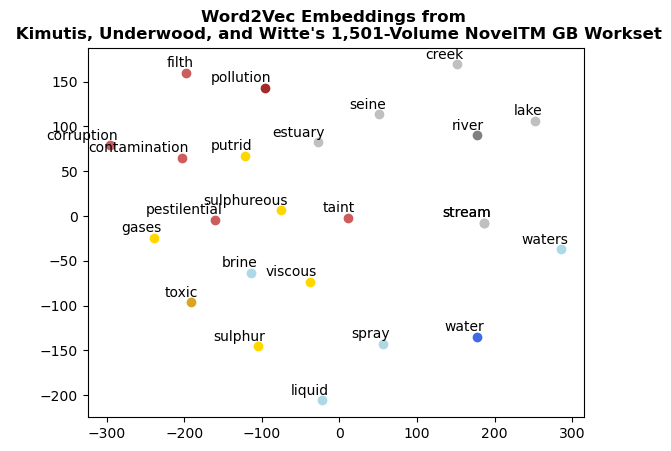

In [49]:
#plot with color coding

labels = [i for i in all_words_GB]
tokens = NovelGB_model.wv[labels]

tsne_model = TSNE(init='pca', learning_rate='auto', perplexity=15)
new_values = tsne_model.fit_transform(tokens)

x= []
y= []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
    
for word in all_words_GB:
    i=labels.index(word)
    plt.annotate(labels[i],
                xy=(x[i], y[i]),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom')
    if word in toxic_similar_GB:
        plt.scatter(x[i], y[i], color='gold')
    elif word == 'toxic':
         plt.scatter(x[i], y[i], color='goldenrod')
    elif word in pollution_similar_GB:
         plt.scatter(x[i], y[i], color='indianred')
    elif word == 'pollution':
         plt.scatter(x[i], y[i], color='brown')
    elif word in river_similar_GB:
         plt.scatter(x[i], y[i], color='silver')
    elif word == 'river':
         plt.scatter(x[i], y[i], color='grey')
    elif word in water_similar_GB:
         plt.scatter(x[i], y[i], color='lightblue')
    elif word == 'water':
        plt.scatter(x[i], y[i], color='royalblue')
    plt.title("Word2Vec Embeddings from \n Kimutis, Underwood, and Witte's 1,501-Volume NovelTM GB Workset", fontweight='bold' )